In [302]:
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import pylab

In [303]:
files = listdir('data')
print(files)

['017.TXT', '074.TXT', '041.TXT', '009.TXT', '014.TXT', '004.TXT', '046.TXT', '099.TXT', '081.TXT', '065.TXT', '025.TXT', '072.TXT', '042.TXT', '066.TXT', '024.TXT', '015 coughing after approx 90s.TXT', '028.TXT', '069.TXT', '090.TXT', '036.TXT', '084.TXT', '022.TXT', '052.TXT', '047.TXT']


In [304]:
with open('data/'+files[0]) as f:
    first_line = f.readline()
    print(first_line)

-0.210	-0.111	7.010	21.260	10.071	23.000	0.000	0.992



In [305]:
data = np.genfromtxt('data/'+files[0], delimiter='\t')

In [306]:
data[0]

array([-0.21 , -0.111,  7.01 , 21.26 , 10.071, 23.   ,  0.   ,  0.992])

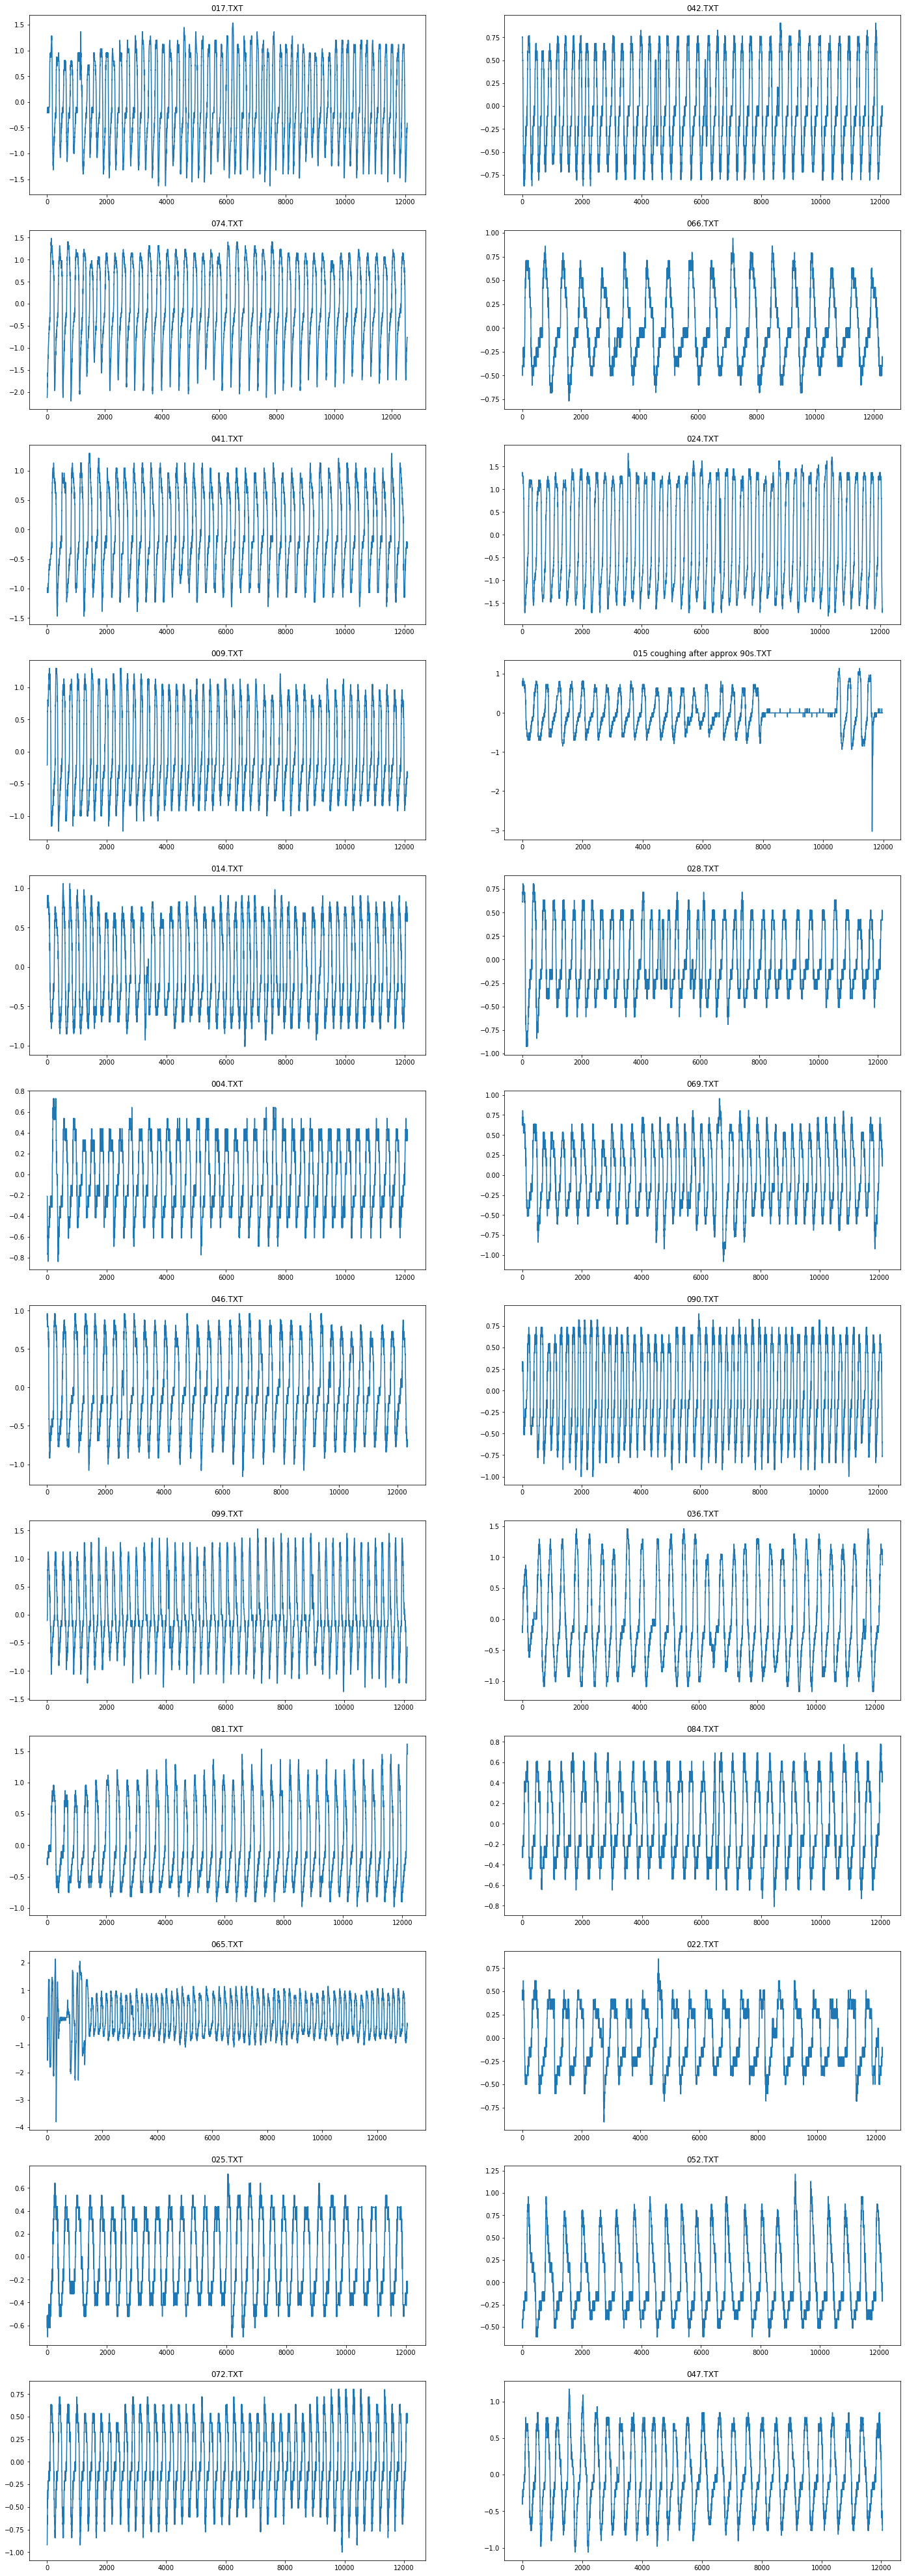

In [307]:
fig, axs = plt.subplots(len(files)//2,2,figsize=(24, len(files)//2 * 6))
p=0
for i in range (2):
    for j in range(len(files)//2):
        if p < len(files):
            #print(files[p],data.shape)
            data = np.genfromtxt('data/'+files[p], delimiter='\t')
            axs[j,i].plot(data[:,0])
            axs[j,i].set_title(files[p])
            p+=1
        

In [308]:
def find_start(signal_data,pos):
            flag = True
            for i in range(1, 4):
                if signal_data[pos - i] > 0:
                    flag = False
            if flag:
                for i in range(1, 4):
                    if signal_data[pos + i] < 0:
                        flag = False
            return (flag,pos) 

In [309]:
def separate_cycles(signal_data):
    data_min = 0
    min_list=[]
    flag = False
    for i in range(signal_data.shape[0]-5):
        if signal_data[i]<0:
            flag,pos = find_start(signal_data,i)
        if flag:
            min_list.append(i)
            flag = False
    return min_list

In [310]:
def split_cycles(min_list,raw_data):
    cycles=[]
    for  i in range(len(min_list)-1):
        d = np.zeros(50)
        c = np.zeros(50)
        j = 0
        l = min_list[i+1]-min_list[i]
        for k in range(min_list[i],min_list[i+1]-1):
            m = int(((k-min_list[i])*50.0)/l)
            d[m]+=raw_data[k]
            c[m]+=1
        for k in range(50):
            d[k] = d[k]/c[k]
        if True in np.isnan(np.array(d)):
            d = []
        else:
            cycles.append(d)
    return cycles

In [311]:
def get_file(file_number):
    data = np.genfromtxt('data/'+files[file_number], delimiter='\t')[:,0]
    #data_average = data.mean()
    #data = data - data_average
    mins = separate_cycles(data)
    cycles = split_cycles(mins,data)
    return cycles

In [312]:
cycles = get_file(6)

/home/ric/Projects/Python/env/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


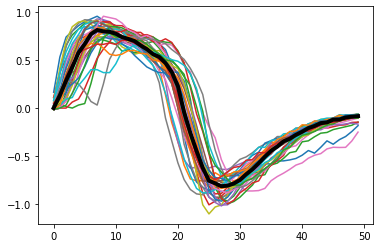

In [313]:
for c in cycles:
    plt.plot(c)
plt.plot(np.median(np.array(cycles),axis=0),linewidth=4, color='black')
plt.show()

In [314]:
def sig_plot():
    median_plots = []
    fig, axs = plt.subplots(len(files)//2,2,figsize=(24, len(files)//2 * 6))
    p=0
    for i in range (2):
        for j in range(len(files)//2):
            if p < len(files):
                cycles = get_file(p)
                for c in cycles:
                     axs[j,i].plot(c)
                m = np.median(np.array(cycles),axis=0)       
                axs[j,i].plot(m,linewidth=4, color='black')
                axs[j,i].set_title(files[p])
                median_plots.append(m)
                p+=1
    return median_plots

In [315]:
def differance(a,b):
    count = 0
    for i in range(a.shape[0]-1):
        #print(a[i],b[i])
        count += np.absolute(a[i]-b[i])
    return count/a.shape[0]

In [316]:
def dendogram_heat_map(distance_data,map_data,tags):
    """ Create s heat map with associated dendogram froma distance N*N numpy matrix and a scipy 
    scipy.cluster.hierarchy linkage 2d array"""
    # Adapted from http://stackoverflow.com/users/208339/steve-tjoa 
    fig = pylab.figure(figsize=(12,12))
    
    # Plot first dendrogram.
    ax1 = fig.add_axes([0.09,0.1,0.2,0.6])#set position
    den1 = sch.dendrogram(map_data, orientation='right',labels=tags)
    # No axis lables
    ax1.set_xticks([])
    #ax1.set_yticks([])

    # Plot second dendrogram.
    ax2 = fig.add_axes([0.31,0.74,0.61,0.2])#set position
    den2 = sch.dendrogram(map_data,labels=tags)
    # No axis lables
    #ax2.set_xticks([])
    ax2.set_yticks([])

    # Plot distance matrix as heat map.
    heat_map = fig.add_axes([0.32,0.1,0.6,0.6])
    idx1 = den1['leaves']
    idx2 = den2['leaves']
    # Reorder the distance data so that it matches with the dendogram order
    distance_data = distance_data[idx1,:]
    distance_data = distance_data[:,idx2]
    hm = heat_map.matshow(distance_data, aspect='auto', origin='lower', cmap=pylab.cm.YlGnBu)
    # No Y axis
    heat_map.set_yticks([])
    heat_map.set_xticks([])
    
 

    # Plot colorbar.
    axcolor = fig.add_axes([0.93,0.1,0.02,0.6])
    pylab.colorbar(hm, cax=axcolor)

In [317]:
def differance(a,b):
    count = 0
    for i in range(a.shape[0]-1):
        #print(a[i],b[i])
        count += np.absolute(a[i]-b[i])
    return count/a.shape[0]

/home/ric/Projects/Python/env/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


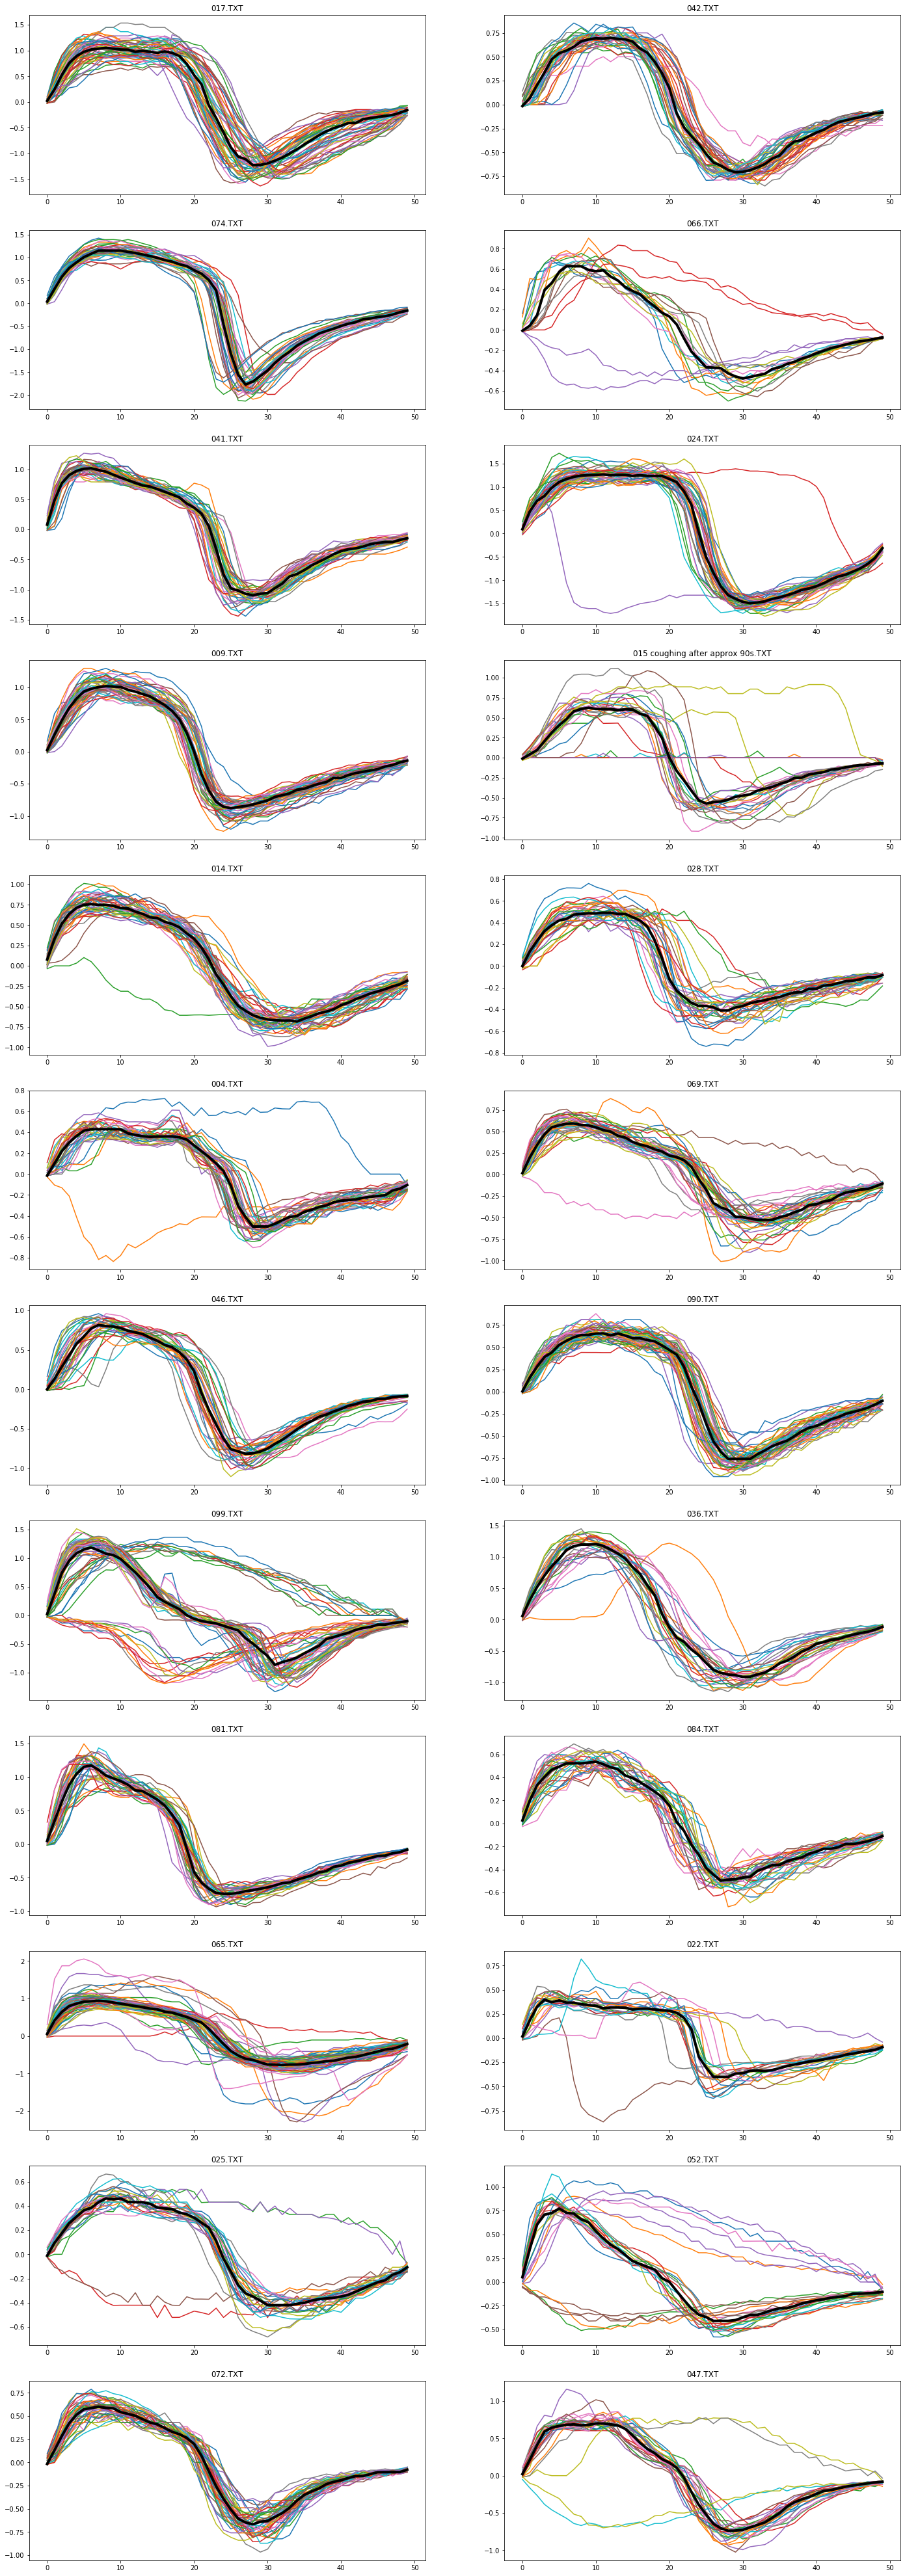

In [318]:
cycles = sig_plot()


In [319]:
distance = np.zeros((len(cycles),len(cycles)))
for i in range(len(cycles)):
    for j in range(len(cycles)):
        distance[i,j]=differance(cycles[i],cycles[j])
kmap = sch.linkage(distance, method='single')

/home/ric/Projects/Python/env/lib/python3.7/site-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


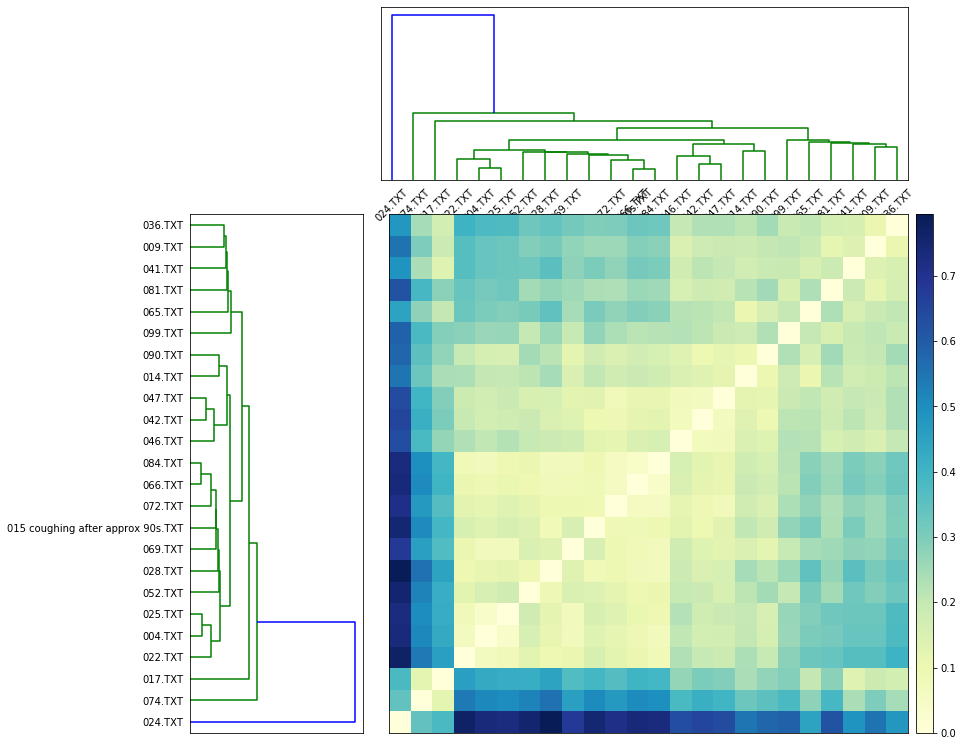

In [320]:
dendogram_heat_map(distance,kmap,files)

In [321]:
def plt_group(in_list):
    plt.figure(figsize=[20,10])
    for i in range(len(cycles)):
        if files[i] in in_list:
            plt.plot(cycles[i],label=[files[i]])
    plt.legend(loc=3,borderpad=2,bbox_to_anchor=(1, 0))
    plt.show()

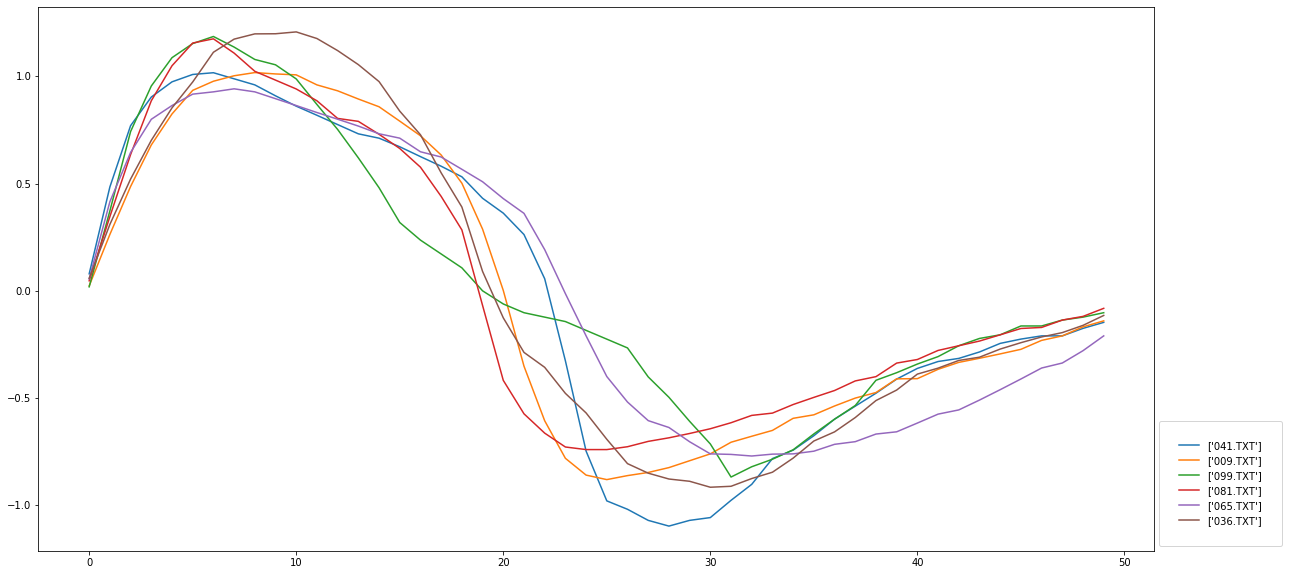

In [332]:
plt_group(['036.TXT','009.TXT','041.TXT','081.TXT','065.TXT','099.TXT'])

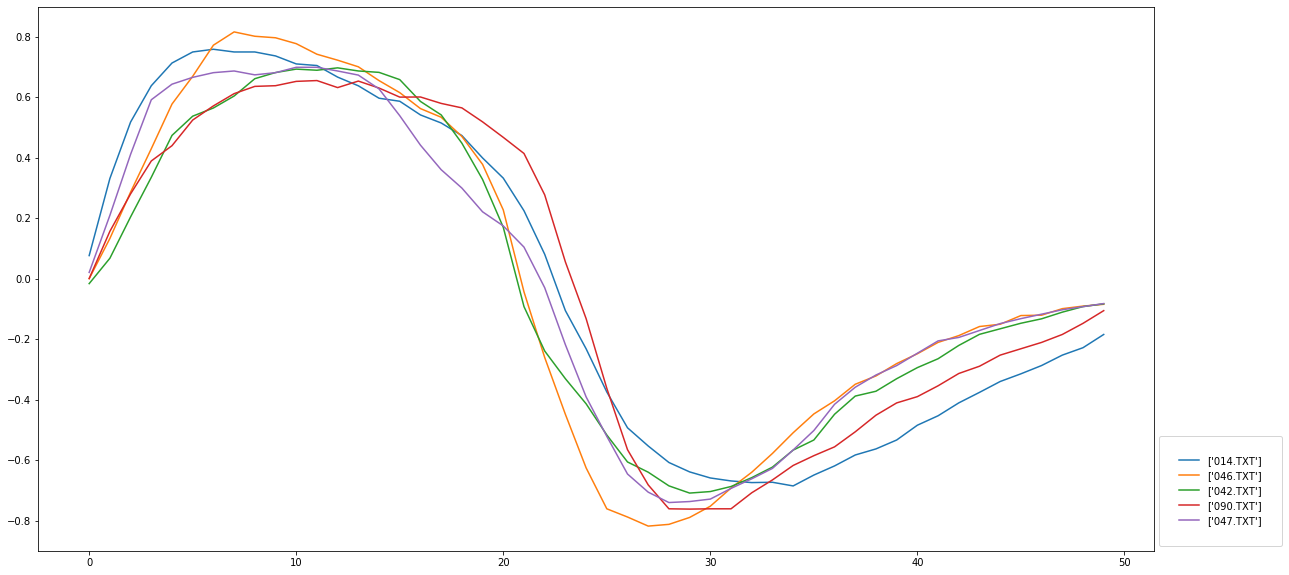

In [333]:
plt_group(['090.TXT','014.TXT','047.TXT','042.TXT','046.TXT'])

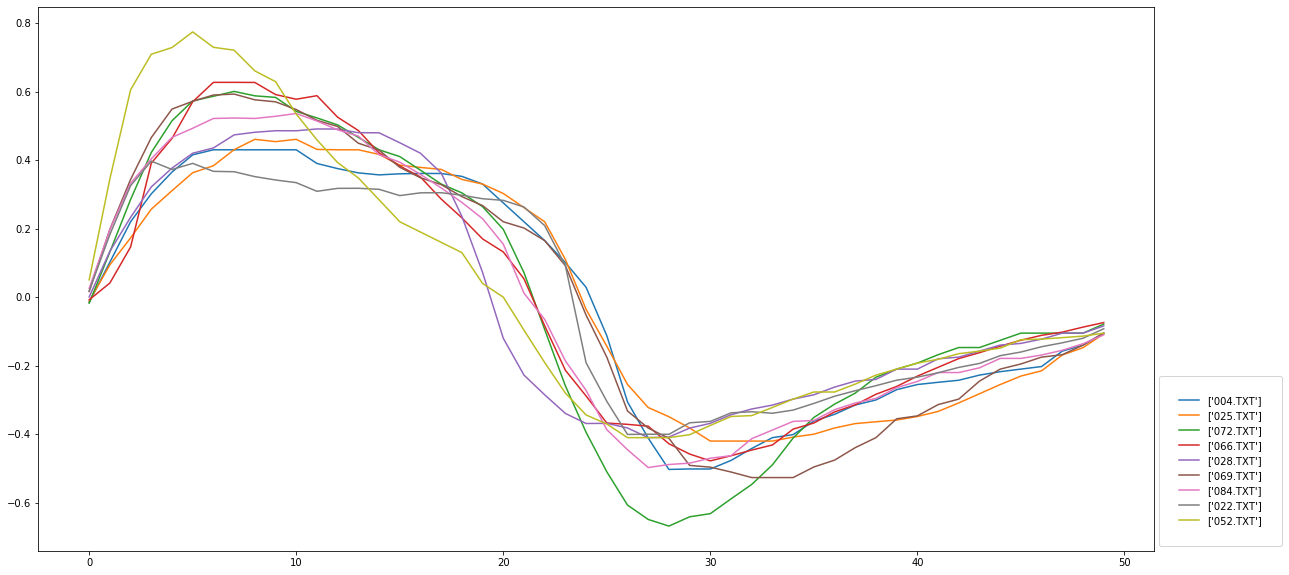

In [334]:
plt_group(['084.TXT','066.TXT','072.TXT','069.TXT','068.TXT','028.TXT','052.TXT','025.TXT','004.TXT','022.TXT'])

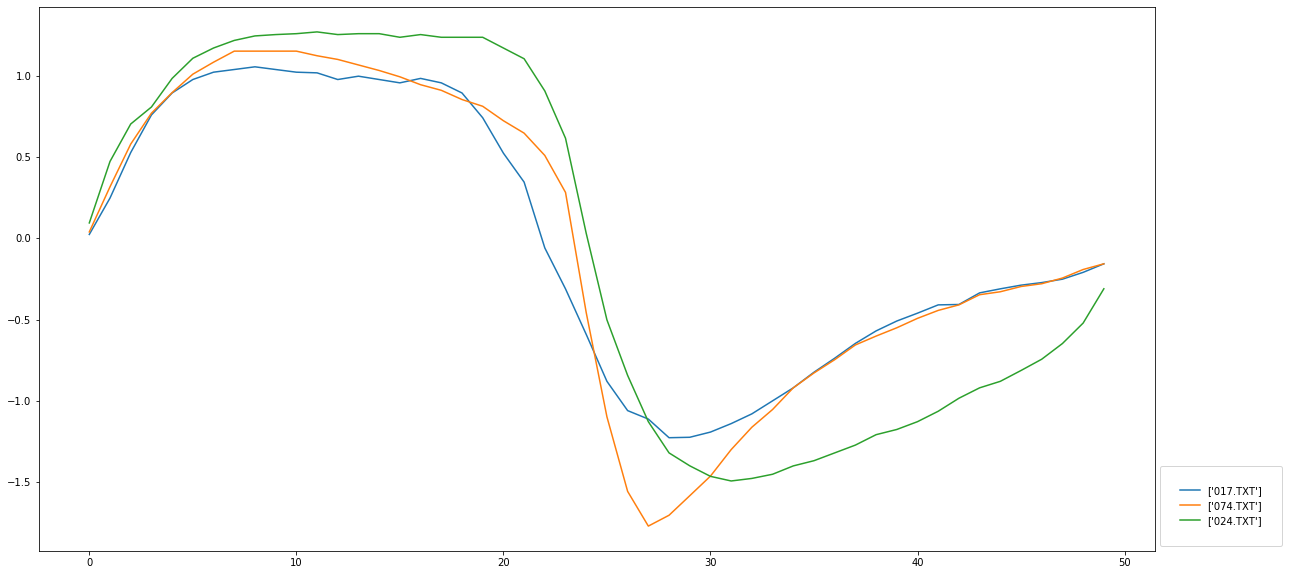

In [335]:
plt_group(['074.TXT','017.TXT','024.TXT'])
